# 1.How the coefficients get affected..?

In [1]:
from sklearn.datasets import load_diabetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=load_diabetes()

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["TARGET"]=data.target

In [4]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [5]:
df.shape

(442, 11)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [7]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [9]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

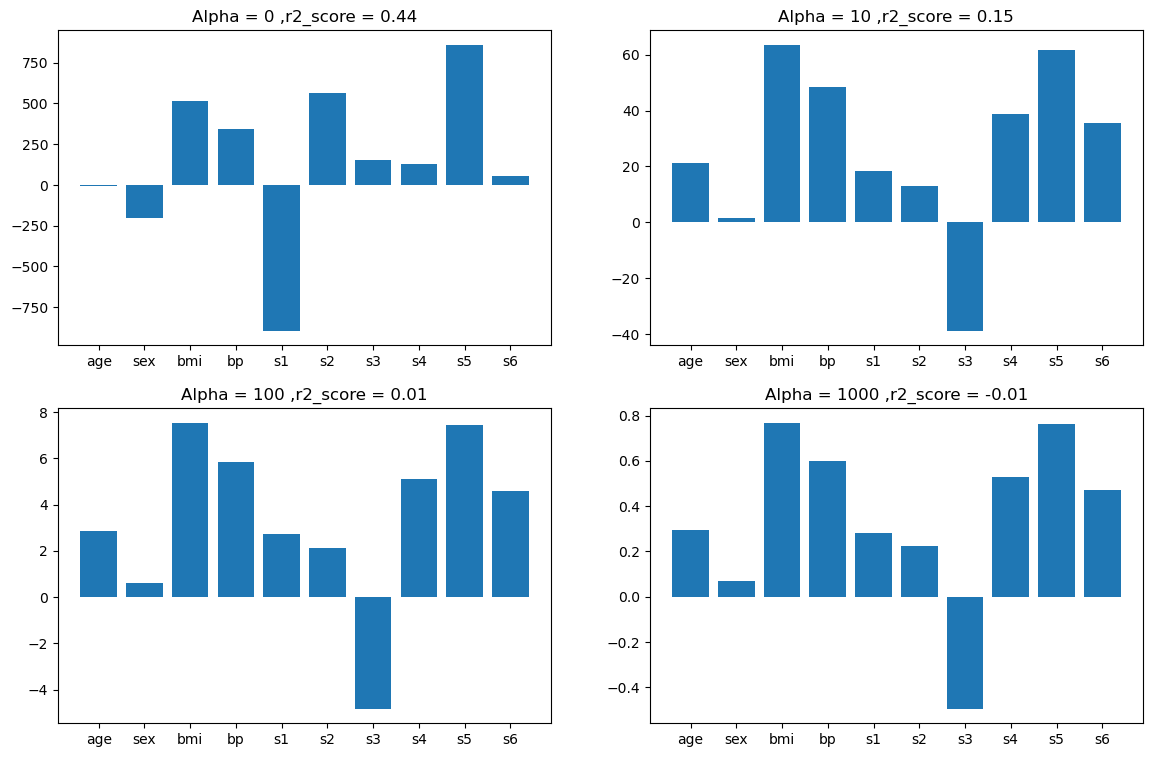

In [10]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

## From  the Above Graphs you can see that as the alpha Vlues ofRidge Increases all the Coefficients in the Datasets Shrink Towars the Zero Respectively (As the All graph look same but you can see the difference on Y_axis scale is Reducing with respect to the vallue of Alpha as it is increasing)

## As the Alpha(theta) increases the Coefficient Values Shrink Towards the Zero ,But never Be Zero

# <hr>

# 2.Higher Coefficients are impacted more..?

In [19]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [20]:
input_array = np.array(coefs)

In [21]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                   
0.0000      -9.158653 -205.454322  516.693745  340.619999 -895.552002   
0.0001      -9.116119 -205.329219  516.889664  340.549436 -883.423872   
0.0010      -8.761487 -204.313404  518.380608  339.967926 -787.700510   
0.0100      -6.399507 -198.662945  522.056516  336.340595 -383.717571   
0.1000       6.643733 -172.237474  485.529585  314.675846  -72.940209   
1.0000      42.242528  -57.304483  282.172125  198.059395   14.363734   
10.0000     21.174024    1.659837   63.659826   48.492858   18.421510   
100.0000     2.858980    0.629453    7.540605    5.849949    2.710879   
1000.0000    0.295726    0.069290    0.769004    0.597824    0.282900   
10000.0000   0.029674    0.006995    0.077054    0.059914    0.028412   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.220679  153.893110  126.731397  861.127002  52.421122  
0.0001      551.559582  148.587063  125.353015  856.485935  52.468916  
0.0010      475.282181  106.795253  114.629265  819.745723  52.873349  
0.0100      152.670882  -66.053243   75.608209  659.875219  55.829221  
0.1000      -80.588688 -174.463527   83.614710  484.365316  73.585091  
1.0000      -22.551079 -136.929684  102.023069  260.104294  98.552692  
10.0000      12.875466  -38.915435   38.842475   61.612302  35.505383  
100.0000      2.142135   -4.834047    5.108223    7.448451   4.576129  
1000.0000     0.225936   -0.495607    0.527031    0.761496   0.471029  
10000.0000    0.022715   -0.049686    0.052870    0.076321   0.047241

## From the above Table you Can notice that , Greater the value of Coefficient It Will, move Faster Towards Zero As Compare to Lower Coefficient.

In [22]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [23]:
input_array = np.array(coefs).T

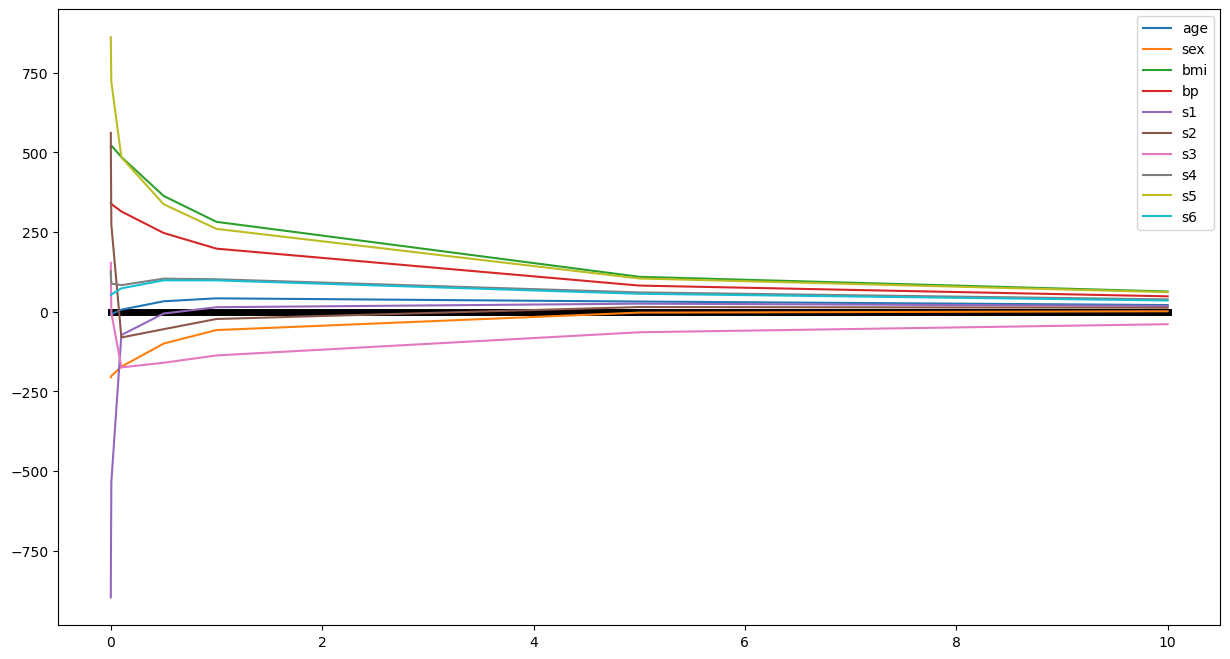

In [24]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

## Ans:<br>From the Above Graph you can see that Coeff with higher Value (for e.g S6, S5,S1) Will move towards Zero Faster(rapidly) with respect to alpha as compare to coeff with low value [Variables are reach towards zero but never be zero (It  will always close to the zero)]

# <hr>

# 3.Impact on Bias & Variance

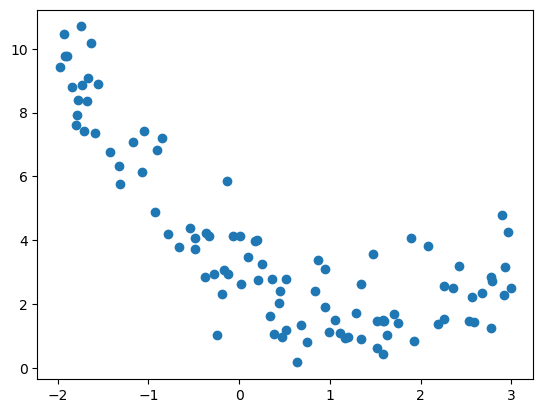

In [37]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

In [ ]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

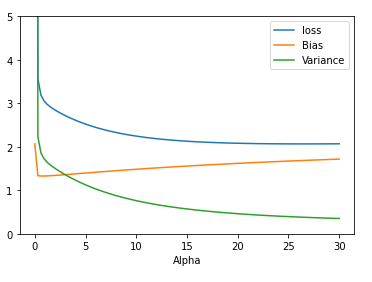

## Alpha(lambda)->Decreases<br>1.Bias Decreases (overfit)<br>2.Variance Increases

## Alpha(lambda)->Increases<br>1.Bias Increases (underfit)<br>2.Variance Decreases

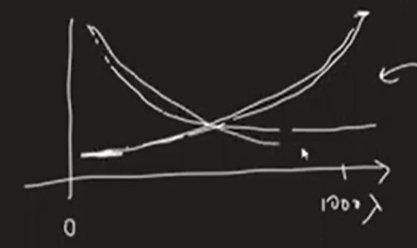

## From the Graph you can clearly see the point at which Both bias And Variance are intecepting is the Point where we want to choose the value of Alpha(lambda)[In this region Bias is low keeping Variance Low As well]

# <hr>

# 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


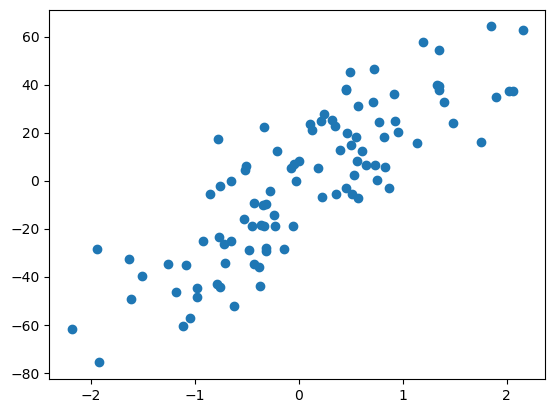

In [45]:
from sklearn.datasets import make_regression

X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [46]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [47]:
def predict(m):
    return m*X-2.29

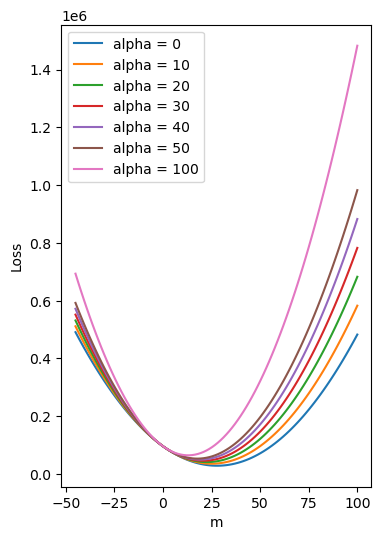

In [50]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()

## From the above Grpah you can see that ,for blue Curve with value of Alpha=0 , is at minima of about 27 , as the Value of Alpha increases the curve raises and Move towards the Zero and make the loss minimum , From above you can see that For Pink Curve with Value of alpha=100 , the minima is near about Zero [Also the loss function will shrink while it move towards Zero]

# For 2 Coefficients

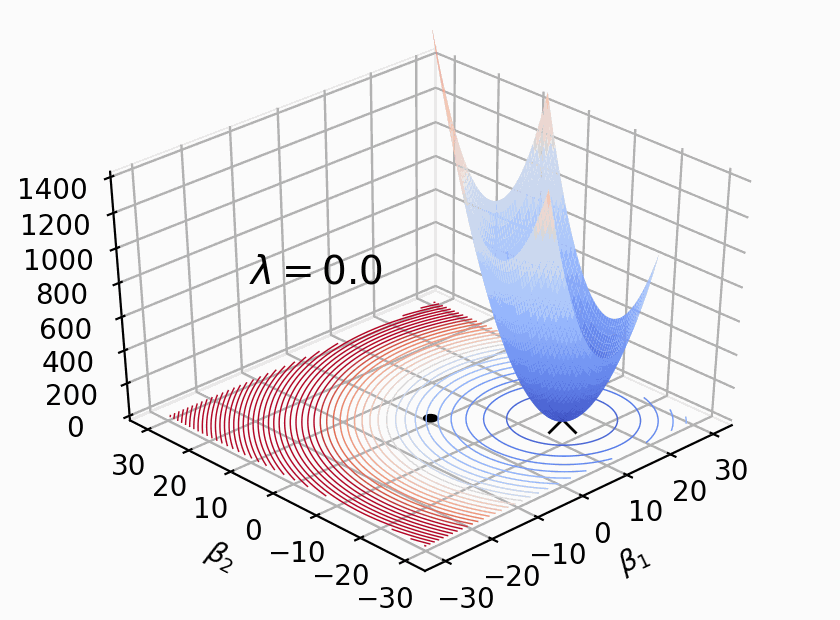

# <hr>

# 5.Why Called Ridge..?

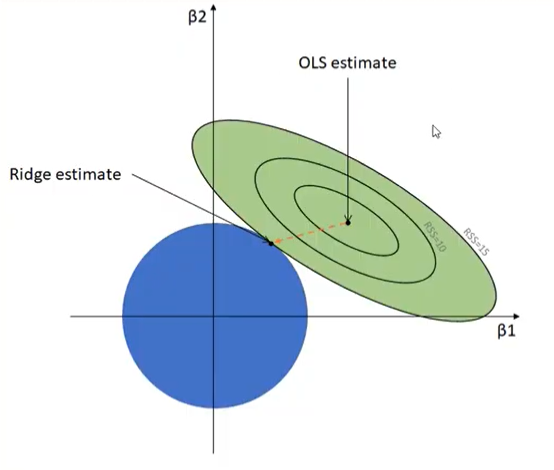

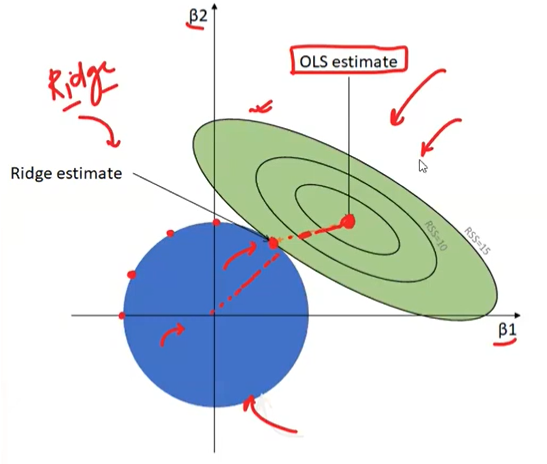

### Depending on the Loss function the Solution is always Obtained On the Perimeter(Circumference of the Circle) and Always Near To the OLS estimated solution , since Our Solution is always on Perimeter of Our Circle this Technique is known as Ridge Regression <br> Shown By Red Dots

# <hr>

## Note:We should Apply the Ridge Regression When We have 2 or more than 2 (=>2)coefficients for input (There is no sense in applying when we have single input and single output coeff)

# Conclude